# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python LECTURE 1 </span>
## <span style="color:orange"> BASIC CONCEPTS, CONTROL STRUCTURES, TYPES </span>

<img src="Pictures/python.png" width="600">

- What is Python ?
- Running Python
- Simple operations
- Strings, integers, floats & type conversions
- Input/Output
- Variables
- Booleans
- Comparison
- If, else & elif statements
- While
- Lists
- None
- Dictionaries, Tuples

<img src="Pictures/cartoon.png" width="400">

Example: Ordinary Differential Equation numerical integrator with symbolic calculus and plot of trajectories in the phase space (Don't worry if you do not understand it now!)

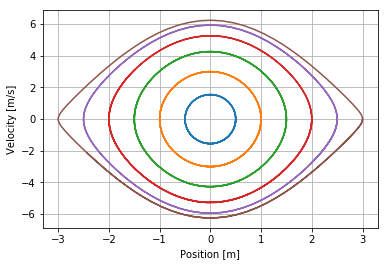

In [1]:
from sympy import *
from sympy.abc import x
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode   # Standing on the shoulders of giants!
m = 1
g = 9.8
L = 1
V = m*g*L*(1-cos(x)) # potential energy
F = -diff(V,x)       # force via symbolic differentiation!
a = F/m              # acceleration
def f(t,position):   # function: [x,v]->[v,a]
    return [position[1], a.evalf(subs={x: position[0]})]
solver = ode(f).set_integrator('dopri5') # 4th order Runge-Kutta solver
instants = 200
t = np.linspace(0.01, 7, instants)
plt.figure(1)
plt.grid()
plt.xlabel('Position [m]')
plt.ylabel('Velocity [m/s]')
for j in range(6):
    start = [(j+1)/2, 0.] # initial value
    solver.set_initial_value(start)
    r = np.zeros(instants)
    v = np.zeros(instants)
    for i in range(instants):
        r[i] = solver.integrate(t[i])[0]
        v[i] = solver.integrate(t[i])[1]
    plt.plot(r,v)
plt.show()

<img src="Pictures/logo1.png" width="400">

## What is Python ?

- Python is a high-level programming language, with applications in numerous areas, including scientific computing, machine learning, artificial intelligence, scripting , quantum computing, and web programming.

- It is very popular and used by organizations such as Google, NASA, etc.

- Python is processed at runtime by the interpreter, which is is a program that runs scripts. There is no need to compile your program before executing it.

- Python is easy to learn. It has efficient high-level data structures and a simple but effective approach to object-oriented programming. 

- Python’s elegant syntax and dynamic typing, together with its interpreted nature, make it an ideal language for scripting and rapid application development in many areas on most platforms.

- Python is also suitable as an extension language for customizable applications.

## Welcome to Python!

- The three major versions of Python are 1.*, 2.* and 3.*. These are subdivided into minor versions, such as 2.7 and 3.6.
- Code written for Python 3.* is guaranteed to work in all future versions.
- Both Python Version 2.* and 3.* are used currently.
- This material covers Python 3.*, but it isn't hard to change from one version to another.
- Python has several different implementations … we will use the Intel Python 3

<img src="Pictures/intel.png" width="400">

# Running Python
- Interactive mode in a Python shell:
<img src="Pictures/run1.png" width="800">
- Interactive mode with IPython:
<img src="Pictures/run2.png" width="800">
- Jupiter notebook (Ipython in a browser):
<img src="Pictures/run3.png" width="800">
<img src="Pictures/run4.png" width="800">

## Running Python 2
- Use of a script:
<img src="Pictures/run5.png" width="800">
- Turn your python script into a unix script:
<img src="Pictures/run6.png" width="800">

## Your First Program
- Let's start by creating a short program that displays "Hello world!".
- In Python, we use the print statement to output text:

In [4]:
print('Hello world!')

Hello world!


- Congratulations! You have written your first program … 
- Python is an interpreted language, which means that each line is executed as it is entered.
- To exit from the Python shell/console type:
    <span style="color:blue"> exit() </span>

## Simple operations
- Python has the capability of carrying out calculations.
- Enter a calculation directly into the Python console, and it will output the answer.

In [5]:
5+4-3

6

- Python also carries out multiplication and division, using an asterisk to indicate multiplication and a forward slash to indicate division.
- Use parentheses to determine which operations are performed first.

In [6]:
2 * (3 + 4)

14

In [7]:
10 / 2

5.0

- The minus sign indicates a negative number:

In [8]:
(-7 + 2) * (-4)

20

- Dividing by zero in Python produces an error, as no answer can be calculated:

In [10]:
11/0

ZeroDivisionError: division by zero

- In Python, the last line of an error message indicates the error's type.
- Read error messages carefully, as they often tell you how to fix a program/script!

## Floats
- Floats are used in Python to represent numbers that aren't integers. Some examples of numbers that are represented as floats are 0.5 and -7.8237591.
- They can be created directly by entering a number with a decimal point, or by using operations such as division on integers. Extra zeros at the number's end are ignored.

In [11]:
3/4

0.75

In [12]:
9.87650000

9.8765

- Computers can't store floats perfectly accurately, in the same way that we can't write down the complete decimal expansion of 1/3 (0.3333333333333333...). Keep this in mind, because it often leads to infuriating bugs!
- A float is also produced by running an operation on two floats, or on a float and an integer.

In [13]:
6 * 7.0

42.0

In [14]:
4 + 1.65

5.65

- A float can be added to an integer, because Python silently converts the integer to a float. 
- However, this implicit conversion is the exception rather the rule in Python - usually you have to convert values manually if you want to operate on them.

## Exponentiation
- Besides addition, subtraction, multiplication, and division, Python also supports exponentiation, which is the raising of one number to the power of another. This operation is performed using two asterisks.

In [15]:
2**5

32

In [16]:
9 ** (1/2)

3.0

## Quotient & Remainder
- To determine the quotient and remainder of a division, use the floor division and modulo operators, respectively
- Floor division is done using two forward slashes
- The modulo operator is carried out with a percent symbol (%)

In [17]:
20 // 6

3

In [18]:
1.25 % 0.5

0.25

- These operators can be used with both floats and integers

## String
- If you want to use text in Python, you have to use a string. A string is created by entering text between two single or double quotation marks.
- When the Python console displays a string, it generally uses single quotes. The delimiter used for a string doesn't affect how it behaves in any way.

In [19]:
"Python is fun!"

'Python is fun!'

In [20]:
'Always look on the bright side of life'

'Always look on the bright side of life'

- Some characters can't be directly included in a string. For instance, double quotes can't be directly included in a double quote string; this would cause it to end prematurely.
- Characters like these must be escaped by placing a backslash before them.
- Other common characters that must be escaped are newlines and backslashes.
- Double quotes only need to be escaped in double quote strings, and the same is true for single quote strings.

In [21]:
'Brian\'s mother: He\'s a naughty boy!'

"Brian's mother: He's a naughty boy!"

- Backslashes can also be used to escape tabs (<span style="color:blue"> \t </span>), arbitrary Unicode characters, and various other things that can't be reliably printed. These characters are known as escape characters.
- <span style="color:blue"> \n </span> represents a new line
- Python provides an easy way to avoid manually writing <span style="color:blue"> \n </span> to escape newlines in a string. Create a string with three sets of quotes, and newlines that are created by pressing Enter are automatically escaped for you.

In [22]:
"""Customer: Good morning.
Owner: Good morning, Sir. Welcome to the National Cheese Emporium."""

'Customer: Good morning.\nOwner: Good morning, Sir. Welcome to the National Cheese Emporium.'

As you can see, the <span style="color:blue"> \n </span> was automatically put in the output, where we pressed <span style="color:blue"> Enter </span>.

## Output
- Usually, programs take input and process it to produce output.
- In Python, you can use the print function to produce output. This displays a textual representation of something to the screen.

In [23]:
print(1 + 1)

2


In [24]:
print("Hello\nWorld!")

Hello
World!


- When a string is printed, the quotes around it are not displayed.

## Input
- To get input from the user in Python, you can use the intuitively named <span style="color:blue"> input </span> function.
- The function prompts the user for input, and returns what they enter as a string (with the contents automatically escaped).

In [27]:
input("Enter something please: ")

Enter something please: This is what\nthe user enters!


'This is what\\nthe user enters!'

- The print and input functions aren't very useful at the Python console, which automatically does input and output. However, they are very useful in actual Python programs and scripts.

## Concatenation
- As with integers and floats, strings in Python can be added, using a process called concatenation, which can be done on any two strings.
- When concatenating strings, it doesn't matter whether they've been created with single or double quotes.

In [28]:
"Spam" + 'eggs'

'Spameggs'

In [29]:
print("First string" + ", " + "second string")

First string, second string


- Even if your strings contain numbers, they are still added as strings rather than integers. Adding a string to a number produces an error, as even though they might look similar, they are two different entities.

In [30]:
"2" + "2"

'22'

In [31]:
1 + '2' + 3 + '4'

TypeError: unsupported operand type(s) for +: 'int' and 'str'

- Strings can also be multiplied by integers. This produces a repeated version of the original string. The order of the string and the integer doesn't matter, but the string usually comes first.

In [32]:
print("spam" * 3)

spamspamspam


- Strings can't be multiplied by other strings. Strings also can't be multiplied by floats, even if the floats are whole numbers.

In [33]:
'17' * '87'

TypeError: can't multiply sequence by non-int of type 'str'

In [34]:
'python is fun' * 7.0

TypeError: can't multiply sequence by non-int of type 'float'

## Type Conversion
- In Python, it's impossible to complete certain operations due to the types involved. For instance, you can't add two strings containing the numbers 2 and 3 together to produce the integer 5, as the operation will be performed on strings, making the result '23'.
- The solution to this is type conversion.
- In the following example, you would use the <span style="color:blue"> int </span> function.

In [35]:
"2" + "3"

'23'

In [36]:
int("2") + int("3")

5

- In Python, the types we have used so far have been integers, floats, and strings. The functions used to convert to these are <span style="color:blue"> int </span>, <span style="color:blue"> float </span> and <span style="color:blue"> str </span>, respectively.
- Another example of type conversion is turning user input (which is a string) to numbers (integers or floats), to allow for the performance of calculations.

In [37]:
float(input("Enter a number: ")) + 	float(input("Enter another number: "))

Enter a number: 40
Enter another number: 2


42.0

- What is the output of the following code?

In [38]:
float("210" * int(input("Enter a number:" )))

Enter a number:2


210210.0

## Variables
- Variables play a very important role in most programming languages, and Python is no exception. A variable allows you to store a value by assigning it to a name, which can be used to refer to the value later in the program.
- To assign a variable, use one equals sign. Unlike most lines of code we've looked at so far, it doesn't produce any output at the Python console.

In [40]:
x=7
print(x)
print(x+3)

7
10


- You can use variables to perform corresponding operations, just as you did with numbers and strings. As you can see, the variable stores its value throughout the program.
- Variables can be reassigned as many times as you want, in order to change their value.
- In Python, variables don't have specific types, so you can assign a string to a variable, and later assign an integer to the same variable.

In [41]:
x = 123.456
print(x)
x = "This is a string"
print(x + "!")

123.456
This is a string!


## Variable names
- Certain restrictions apply in regard to the characters that may be used in Python variable names. The only characters that are allowed are letters, numbers, and underscores. Also, they can't start with numbers.
- Not following these rules results in errors.

In [43]:
this_is_a_normal_name = 7
123abc = 7

SyntaxError: invalid syntax (<ipython-input-43-dd1e98a0ad62>, line 2)

In [44]:
spaces are not allowed

SyntaxError: invalid syntax (<ipython-input-44-3b7144d6953f>, line 1)

- Python is a case sensitive programming language. Thus, Lastname and lastname are two different variable names in Python.
- Trying to reference a variable you haven't assigned to causes an error.

In [46]:
foo = "a string"
foo

'a string'

In [47]:
bar

NameError: name 'bar' is not defined

- You can use the <span style="color:blue"> del </span> statement to remove a variable, which means the reference from the name to the value is deleted, and trying to use the variable causes an error. Deleted variables can be reassigned to later as normal.

In [48]:
foo = "a string"
del foo
foo

NameError: name 'foo' is not defined

- You can also take the value of the variable from the user input.

In [49]:
foo = input("Enter a number: ")
print(foo)

Enter a number: 7
7


- … but, of course, <span style="color:red"> no check is done on the input type </span>:

In [50]:
foo = input("Enter a number: ")
print(foo)

Enter a number: dog
dog


## In-place operators
- In-place operators allow you to write code like **x = x + 3** more concisely, **as x += 3**
- The same thing is possible with other operators such as -, *, / and % as well.

In [51]:
x=2
x+=3
print(x)
x='spam'
x+='eggs'
print(x)

5
spameggs


- Many other languages have special operators such as <span style="color:blue"> ++ </span> as a shortcut for <span style="color:blue"> x += 1 </span>. Python **does not** have these.

## Using an editor
- So far, we've only used Python with the console, entering and running one line of code at a time.
- Actual programs/scripts are created differently; many lines of code are written in a file, using a text editor, and then executed with the Python interpreter.
- Python source files have an extension of **.py**
- As seen in the first examples, Python programs/scripts can be executed at the shell prompt by entering: **python script.py**

## Booleans
- Another type in Python is the Boolean type. There are two Boolean values: **True** and **False**.
- They can be created by comparing values, for instance by using the equal operator <span style="color:blue"> == </span>

In [52]:
my_boolean = True
my_boolean

True

In [53]:
2 == 3

False

In [54]:
"hello" == "hello"

True

- Be careful not to confuse assignment (one equals sign) with comparison (two equals signs).

## Comparison
- Another comparison operator, the not-equal operator **!=** , evaluates to True if the items being compared aren't equal, and False if they are

In [75]:
1 != 1

False

In [56]:
"eleven" != "seven"

True

In [57]:
2 != 10

True

- Python also has operators that determine whether one number (float or integer) is greater-than or smaller-than another. These operators are <span style="color:blue"> > </span> and <span style="color:blue"> \< </span> respectively.

In [61]:
7 > 5

True

In [62]:
10 < 10

False

- The greater-than-or-equal-to, and smaller-than-or-equal-to operators are <span style="color:blue"> >= </span> and <span style="color:blue"> \<= </span>
- They return **True** when comparing equal numbers

In [60]:
7 <= 8

True

In [63]:
9 >= 9.0

True

- Greater-than and smaller-than operators can also be used to compare strings lexicographically (the alphabetical order of words is based on the alphabetical order of their component letters).

In [64]:
'a' < 'b'

True

In [65]:
'professor' > 'student'

False

## if statements & indentation
- You can use **if** statements to run code if a certain condition holds.
- If an expression evaluates to **True**, some statements are carried out. Otherwise, they aren't carried out.
- An **if** statement looks like this:

        if expression:
            statements
- Python uses indentation (white space at the beginning of a line) to delimit blocks of code. 
- Other languages, such as C++, use curly braces to accomplish this, but **in Python indentation is mandatory**; programs won't work without it. As you can see, the statements in the **if** should be indented
- Notice the colon, :, at the end of the expression in the if statement
- Here is an example **if** statement:

In [67]:
if 10 > 5:
   print("10 greater than 5")
print("Program ended")

10 greater than 5
Program ended


- To perform more complex checks, if statements can be nested, one inside the other.
- This means that the inner if statement is the statement part of the outer one. This is one way to see whether multiple conditions are satisfied. For example:

In [68]:
num = 12
if num > 5:
   print("Bigger than 5")
   if num <= 47:
      print("Between 5 and 47")

Bigger than 5
Between 5 and 47


- An **else** statement follows an **if** statement, and contains code that is called when the **if** statement evaluates to **False**.
- As with **if** statements, the code inside the block should be indented.

In [69]:
x = 4
if x == 5:
   print("Yes")
else:
   print("No")

No


- You can chain **if** and **else** statements to determine which option in a series of possibilities is true. For example:

In [70]:
num = 7
if num == 5:
  print("Number is 5")
else: 
  if num == 11:
    print("Number is 11")
  else:
    if num == 7:
      print("Number is 7")
    else: 
      print("Number isn't 5, 11 or 7")

Number is 7


- The **elif** (short for else if) statement is a shortcut to use when chaining **if** and **else** statements. A series of **if elif** statements can have a final else block, which is called if none of the **if** or **elif** expressions is **True**.

In [71]:
num = 7
if num == 5:
   print("Number is 5")
elif num == 11:
   print("Number is 11")
elif num == 7:
   print("Number is 7")
else:
   print("Number isn't 5, 11 or 7")

Number is 7


## Boolean logic
- Python uses words for its Boolean operators.
- Boolean logic is used to make more complicated conditions for if statements that rely on more than one condition.
- Python's Boolean operators are **and**, **or**, and **not**.
- The and operator takes two arguments, and evaluates as **True** if, and only if, both of its arguments are **True**. Otherwise, it evaluates to **False**.

In [72]:
1 == 1 and 2 == 2

True

In [73]:
1 == 1 and 2 == 3

False

In [76]:
1 != 1 and 2 == 2

False

In [77]:
2 < 1 and 3 >  6

False

## Operator Precedence
- Operator precedence is a very important concept in programming. It is an extension of the mathematical idea of order of operations (multiplication being performed before addition, etc.) to include other operators, such as those in Boolean logic.
- The below code shows that **==** has a higher precedence than **or**:

In [78]:
False == False or True

True

In [79]:
False == (False or True)

False

In [80]:
(False == False) or True

True

- Python's order of operations is the same as that of normal mathematics: parentheses first, then exponentiation, then multiplication/division, and then addition/subtraction.
- The following table lists all of Python's operators, from highest precedence to lowest.

<img src="Pictures/precedence.png" width="600">

## while loops
- The statements inside a **while** statement are repeatedly executed, as long as the condition holds. Once it evaluates to **False**, the next section of code is executed. The code in the body of a while loop is executed repeatedly. This is called iteration
- Below is a while loop containing a variable that counts up from 1 to 5, at which point the loop terminates.

In [82]:
i = 1
while i <= 5:
   print(i)
   i = i + 1

print("Finished!")

1
2
3
4
5
Finished!


- To end a while loop prematurely, the **break** statement can be used.
- When encountered inside a loop, the **break** statement causes the loop to finish immediately.

In [83]:
i = 0
while 1==1:
  print(i)
  i = i + 1
  if i >= 5:
    print("Breaking")
    break

print("Finished")

0
1
2
3
4
Breaking
Finished


- Another statement that can be used within loops is **continue**. Unlike **break**, **continue** jumps back to the top of the loop, rather than stopping it
- Basically, the **continue** statement stops the current iteration and continues with the next one.

In [84]:
i = 0
while True:
   i = i + 1
   if i == 2:
      print("Skipping 2")
      continue
   if i == 5:
      print("Breaking")
      break
   print(i)
print("Finished")

1
Skipping 2
3
4
Breaking
Finished


## Lists
- Lists are another type of object in Python. They are used to store an indexed list of items.
- A list is created using square brackets with commas separating items.
- The certain item in the list can be accessed by using its index in square brackets.

In [1]:
words = ["Hello", "world", "!"]
print(words[0])
print(words[1])
print(words[2])

Hello
world
!


- The first list item's index is 0, rather than 1, as might be expected.
- Typically, a list will contain items of a single item type, but it is also possible to include several different types.
- Lists can also be nested within other lists.

In [2]:
number = 3
things = ["string", 0, [1, 2, number], 4.56]
print(things[1])
print(things[2])
print(things[2][2])

0
[1, 2, 3]
3


- Lists of lists are often used to represent 2D grids, as basic Python lacks the multidimensional arrays â¦ but the <span style="color:red"> numpy </span> module fills this lack.
- Indexing out of the bounds of possible list values causes an **IndexError**.
- Some types, such as strings, can be indexed like lists. Indexing strings behaves as though you are indexing a list containing each character in the string.

In [3]:
str = "Hello world!"
print(str[6])

w


## List operations
- The item at a certain index in a list can be reassigned.

In [4]:
nums = [7, 7, 7, 7, 7]
nums[2] = 5
print(nums)

[7, 7, 5, 7, 7]


- Lists and strings are similar in many ways - **strings can be thought of as lists of characters that can't be changed**.
- Lists can be added and multiplied in the same way as strings.

In [5]:
nums = [1, 2, 3]
print(nums + [4, 5, 6])
print(nums * 3)

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 1, 2, 3, 1, 2, 3]


- To check if an item is in a list, the **in** operator can be used. It returns **True** if the item occurs one or more times in the list, and **False** if it doesn't.

In [6]:
words = ["spam", "egg", "spam", "sausage"]
print("spam" in words)
print("egg" in words)
print("tomato" in words)

True
True
False


- The **in** operator is also used to determine whether or not a string is a substring of another string.
- To check if an item is not in a list, you can use the not operator in one of the following ways:

In [7]:
nums = [1, 2, 3]
print(not 4 in nums)
print(4 not in nums)
print(not 3 in nums)
print(3 not in nums)

True
True
False
False


- Another way of altering lists is using the append method. This adds an item to the end of an existing list.

In [8]:
nums = [1, 2, 3]
nums.append(4)
print(nums)

[1, 2, 3, 4]


- The dot before **append** is there because it is a method of the list class
- <span style="color:orange"> In these lectures we will **not** deepen the Object Oriented side of Python</span>. (Do it yourself, if you are interested).

## List functions
- To get the number of items in a list, you can use the **len** function.

In [9]:
nums = [1, 3, 5, 2, 4]
print(len(nums))

5


- **len** is a normal function, rather than a method. This means it is written before the list it is being called on, without a dot.
- The **insert** method is similar to **append**, except that it allows you to insert a new item at any position in the list, as opposed to just at the end.

In [10]:
words = ["Python", "fun"]
index = 1
words.insert(index, "is")
print(words)

['Python', 'is', 'fun']


- Often used in conditional statements, **all** and **any** take a list as an argument, and return **True** if all or any (respectively) of their arguments evaluate to **True** (and **False** otherwise).

In [13]:
nums = [55, 44, 33, 22, 11]
if all([i > 5 for i in nums]):
   print("All larger than 5")
if any([i % 2 == 0 for i in nums]):
   print("At least one is even")

All larger than 5
At least one is even


- To find the maximum or minimum of some numbers or a list, you can use **max** or **min**.
- To find the distance of a number from zero (its absolute value), use **abs**.
- To round a number to a certain number of decimal places, use **round**.
- To find the total of a list, use **sum**.

Some examples:

In [14]:
print(min(1, 2, 3, 4, 0, 2, 1))
print(max([1, 4, 9, 2, 5, 6, 8]))
print(abs(-99))
print(abs(42))
print(round(3.14159))
print(round(3.14159,2))
print(sum([1, 2, 3, 4, 5]))

0
9
99
42
3
3.14
15


- The **range** function creates a sequential list of numbers.
- The code below generates a list containing all of the integers, up to 10.

In [15]:
numbers = list(range(10))
print(numbers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


- If **range** is called with two arguments, it produces values from the first to the second.

In [16]:
numbers = list(range(3, 8))
print(numbers)
print(range(20) == range(0, 20))

[3, 4, 5, 6, 7]
True


- **range** can have a third argument, which determines the interval of the sequence produced. This third argument must be an integer.

In [17]:
numbers = list(range(5, 20, 2))
print(numbers)

[5, 7, 9, 11, 13, 15, 17, 19]


## List slices
- <span style="color:red"> List slices </span> provide a more advanced way of retrieving values from a list. Basic list slicing involves indexing a list with two colon-separated integers. This returns a new list containing all the values in the old list between the indices.

In [18]:
squares = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
print(squares[2:6])
print(squares[3:8])
print(squares[0:1])

[4, 9, 16, 25]
[9, 16, 25, 36, 49]
[0]


- Like the arguments to range, the first index provided in a slice is included in the result, but the second isn't.
- If the first number in a slice is omitted, it is taken to be the start of the list.
- If the second number is omitted, it is taken to be the end.

In [19]:
squares = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
print(squares[:7])
print(squares[7:])

[0, 1, 4, 9, 16, 25, 36]
[49, 64, 81]


- List slices can also have a third number, representing the step, to include only alternate values in the slice.

In [20]:
squares = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
print(squares[::2])
print(squares[2:8:3])

[0, 4, 16, 36, 64]
[4, 25]


- Negative values can be used in list slicing (and normal list indexing). When negative values are used for the first and second values in a slice (or a normal index), they count from the end of the list.

In [21]:
squares = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
print(squares[1:-1])

[1, 4, 9, 16, 25, 36, 49, 64]


- If a negative value is used for the step, the slice is done backwards.
- Using **[ : :-1]** as a slice is a common and idiomatic way to reverse a list.

## List comprehensions
- List comprehensions are a useful way of quickly creating lists whose contents obey a simple rule.
- For example, we can do the following: 

In [22]:
# a list comprehension
cubes = [i**3 for i in range(5)]
print(cubes)

[0, 1, 8, 27, 64]


- A list comprehension can also contain an **if** statement to enforce a condition on values in the list.
- Example:

In [23]:
evens=[i**2 for i in range(10) if i % 2 == 0]
print(evens)

[0, 4, 16, 36, 64]


## None
- The **None** object is used to represent the absence of a value. It is similar to **null** in other programming languages.
- Like other "empty" values, such as 0, [] and the empty string "", it is False when converted to a Boolean variable.

In [26]:
None == None

True

In [30]:
a = bool(None)
print(a)

False


- The None object is returned by any function that doesn't explicitly return anything else.

In [32]:
def some_func():
   print("Hi!")

var = some_func()
print(var)

Hi!
None


## Dictionaries
- Dictionaries are data structures used to map arbitrary keys to values. they are created using braces {}
- Lists can be thought of as dictionaries with integer keys within a certain range.
- Dictionaries can be indexed in the same way as lists, using square brackets containing keys.
- Example:

In [7]:
ages = {"Dave": 24, "Mary": 42, "John": 58}
print(ages["Dave"])
print(ages["Mary"])
type(ages)

24
42


dict

- Each element in a dictionary is represented by a **key : value** pair.

## Tuples
- Tuples are very similar to lists, except that they are immutable (they cannot be changed).
- Also, they are created using parentheses, rather than square brackets:

In [6]:
words = ("spam", "eggs", "sausages")
print(words[0])
type(words)

spam


tuple

- Tuples can be created also without the parentheses, by just separating the values with commas.
- Example:

In [8]:
my_tuple = "one", "two", "three"
print(my_tuple[0])

one


- An empty tuple is created using an empty parenthesis pair: **tpl = ()**
- Tuples are faster than lists, but they cannot be changed.
- Slicing can also be done on tuples.

## Suggested books & material
Hans Petter Langtangen:
- A Primer on Scientific Programming with Python
- Python Scripting for Computational Science